In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import missingno as mso
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
orig_df=pd.read_csv("dataset.csv")

In [ ]:
mso.matrix(orig_df)

In [4]:
orig_df['class'].replace('Original',0,inplace=True)
orig_df['class'].replace('Tampered',1,inplace=True)
orig_df.head(2)

,Unnamed: 0,mse,mse_lab,mse_magnitude,mse_phase,med_magnitude,med_phase,hvs1,hvs2,hvs3,ssim,ncc,if_value,histogram,class
0,0,9.0,9.877472,9.877472,0.536317,3.0,0.0,0.010558,0.167482,119.092026,0.996628,0.000497,5.437050,10.558747,0
1,1,61.0,0.384586,61.740210,3.270667,0.0,0.0,0.011835,0.023007,152.885336,0.989379,0.000548,31.364796,7.525040,0


In [ ]:
# Create a new dataframe with only the features we want to use for PCA and clustering (column with numerical - int and float - values)
num_cols=orig_df.select_dtypes(include=['int64','float64'])
df=orig_df[num_cols.columns]
df=df.drop('Unnamed: 0',axis=1)
df.info()

In [6]:
df.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace inf values with NaN
df.dropna(inplace=True) # Drop rows with NaN values
# X,Y are the features and target variables respectively
X = df.drop('class',axis=1) # Drop the target variable
y = df['class'] # Keep the target variable
X= np.log1p(X) # Handle extremely large values by taking the log of the values

In [7]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [8]:

scaled_df=pd.DataFrame(X,columns=df.drop('class',axis=1).columns)
scaled_df.head()

,mse,mse_lab,mse_magnitude,mse_phase,med_magnitude,med_phase,hvs1,hvs2,hvs3,ssim,ncc,if_value,histogram
0,-0.372357,1.063822,-0.385124,-0.904226,-0.688979,-0.653720,-0.393702,0.580042,0.393523,0.365022,0.491562,-0.464587,0.116597
1,0.686592,-0.837430,0.682290,1.087222,-1.223949,-0.653720,-0.362076,-0.670903,1.496506,0.160162,0.693754,0.652739,-0.939672
2,1.195484,2.870178,1.210809,-0.965048,-0.087693,-0.653720,-0.267898,-0.562769,1.198977,0.174423,-0.306488,1.240565,-0.871809
3,0.417539,0.345807,0.394694,0.229854,0.914420,1.225954,-0.110651,0.011618,0.506307,0.092701,0.045937,0.338773,0.627603
4,1.372109,0.189048,1.396892,1.376972,0.914420,1.750542,0.843237,2.124067,1.303572,-0.459071,-0.205087,1.449437,0.298507


In [9]:
# Applying PCA
pca=PCA(n_components=3)
pca_res=pca.fit_transform(scaled_df)
pca_df=pd.DataFrame(pca_res,columns=['PC1','PC2','PC3',]) # this is reduced dimensional dataframe


In [13]:
pca_df['class']=y.values
# print(y.value_counts)

In [14]:
# for each principal compnent explained_variance_ratio tell us how much of the important information from the data is contained in that principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio: ", explained_variance_ratio)

Explained variance ratio:  [0.38521463 0.14871447 0.13151551]


In [15]:
px.scatter(pca_df, x='PC1', y='PC2',color='class')

In [ ]:
px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',color='class')

In [17]:
# Performing clustering using KMeans algorithm on pca_df which is a reduced dimensional dataframe
kmeans=KMeans(n_clusters=2,n_init='auto',random_state=42)
cluster=kmeans.fit_predict(pca_df)
pca_df['cluster']=cluster


In [18]:
pca_df

,PC1,PC2,PC3,class,cluster
0,-1.157228,0.191843,1.218962,0,0
1,0.355102,0.451994,-0.555755,0,0
2,1.293572,-1.400318,1.906274,0,1
3,0.727007,-1.578210,0.133396,0,1
4,3.093880,-1.206413,0.303459,0,1
...,...,...,...,...,...
12599,2.873582,-0.539328,-0.773675,1,1
12600,2.034315,-0.916943,-1.402102,1,1
12601,0.152115,-0.447229,-0.500256,1,0
12602,-1.598741,-0.407343,-0.718131,1,0


In [19]:
pca_df['cluster'].value_counts()

cluster
0    7967
1    4637
Name: count, dtype: int64

In [ ]:
px.scatter(pca_df, x='PC1', y='PC2',color='cluster')

In [ ]:
px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',color='cluster')

array([[<Axes: title={'center': 'mse'}>,
        <Axes: title={'center': 'mse_lab'}>,
        <Axes: title={'center': 'mse_magnitude'}>,
        <Axes: title={'center': 'mse_phase'}>],
       [<Axes: title={'center': 'med_magnitude'}>,
        <Axes: title={'center': 'med_phase'}>,
        <Axes: title={'center': 'hvs1'}>,
        <Axes: title={'center': 'hvs2'}>],
       [<Axes: title={'center': 'hvs3'}>,
        <Axes: title={'center': 'ssim'}>,
        <Axes: title={'center': 'ncc'}>,
        <Axes: title={'center': 'if_value'}>],
       [<Axes: title={'center': 'histogram'}>,
        <Axes: title={'center': 'class'}>, <Axes: >, <Axes: >]],
      dtype=object)

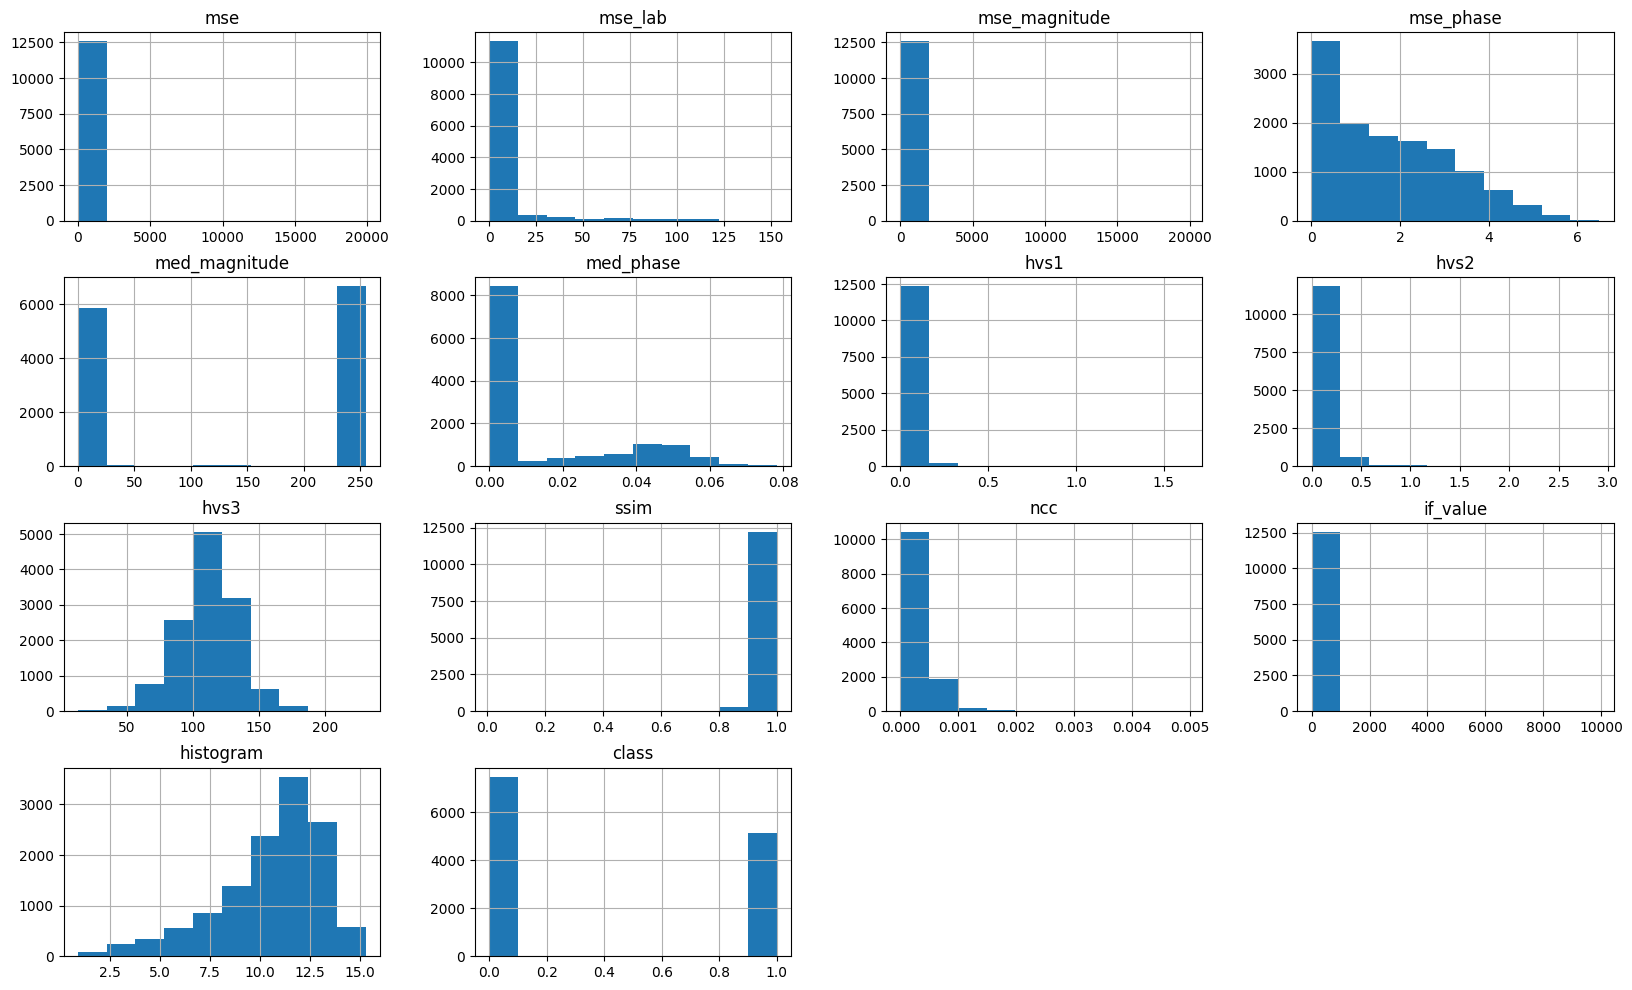

In [22]:
df.hist(figsize=(20, 12))